In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
from scipy.signal import periodogram
import ordpy 
import statsmodels.api as sm
from scipy.signal import butter,filtfilt
from matplotlib.pyplot import figure
from os import listdir
from os.path import isfile, join
from statsmodels.tsa.stattools import adfuller
from tqdm.notebook import tqdm
from datetime import datetime, timedelta
import pickle
import re
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from scipy.stats import shapiro 
from scipy.stats import kstest
import EntropyHub as EH
from scipy import interpolate
import math
import nolds
from scipy import signal

d:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
class pain_monitering_D1:
    def __init__(self,PID):
        self.PID=PID
        self.D1_rating=[]
        self.D1_time=[]
        self.D1_prediction=-1
        self.D1_confidence=-1
    def __str__(self):
        print("participant: "+self.PID)
        print("Day 1 rating: "+str(len(self.D1_rating))+" sessions")
        print("Day 1 timing: "+str(len(self.D1_time))+" sessions")
        print("Day 1 prediction: "+ str(self.D1_prediction))
        print("Day 1 confidence: "+ str(self.D1_confidence))
        return ""
    def update_rating_time(self,rating,time):
        self.D1_rating=rating
        self.D1_time=time
    def update_prediction_confidence(self,pred,conf):
        self.D1_prediction=pred
        self.D1_confidence=conf

In [3]:
Day1_list=pd.read_pickle('../data/dataset/D1_data_downsample.pkl')["Day1_part_downsample_list"]

m=2, r=0.2

In [4]:
m=2
r=0.2
SampEn_m2_r02_part=[]
SampEn_m2_r02=[]
inf_count=0
zero_count=0
for part in tqdm(Day1_list):
    SampEn_part=[]
    for session in part.D1_rating:
        r_std=r*np.std(session)
        en=nolds.sampen(session, emb_dim=m, tolerance=r_std)
        SampEn_part.append(en)
        if math.isinf(en):
            inf_count+=1
        else:
            SampEn_m2_r02.append(en)
            if en==0:
                zero_count+=1
    SampEn_m2_r02_part.append(SampEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

In [5]:
print("mean:"+str(np.mean(SampEn_m2_r02)))
print("std:"+str(np.std(SampEn_m2_r02)))

mean:0.027610433340187902
std:0.06777634830074118


In [8]:
all_rating=[]
for part in tqdm(Day1_list):
    for session in part.D1_rating:
        all_rating.append(session.tolist())
df=pd.DataFrame({
    "Sharon rating":all_rating
})
df.to_pickle("../data/dataset/Sharon_allrating.pkl")

  0%|          | 0/79 [00:00<?, ?it/s]

In [6]:
df=pd.DataFrame({
    "Sharon entropy":SampEn_m2_r02
})
df.to_pickle("../data/dataset/Sharon_m2r02_Sampen.pkl")

valid entropy value: 248
infinity value: 1
zero value: 1


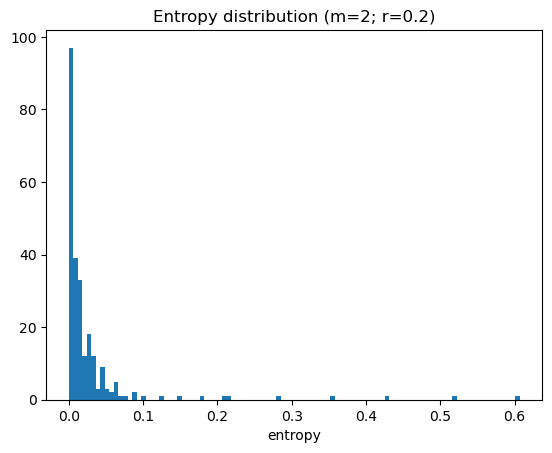

In [19]:
print("valid entropy value: "+str(len(SampEn_m2_r02)))
print("infinity value: "+str(inf_count))
print("zero value: "+str(zero_count))
plt.xlabel("entropy")
plt.title("Entropy distribution (m=2; r=0.2)")
plt.hist(SampEn_m2_r02, bins=100)
plt.show()

In [20]:
m=200
r=0.5
SampEn_m200_r05_part=[]
SampEn_m200_r05=[]
inf_count_200=0
zero_count_200=0
for part in tqdm(Day1_list):
    SampEn_part=[]
    for session in part.D1_rating:
        r_std=r*np.std(session)
        en=nolds.sampen(session, emb_dim=m, tolerance=r_std)
        SampEn_part.append(en)
        if math.isinf(en):
            inf_count_200+=1
        else:
            SampEn_m200_r05.append(en)
            if en==0:
                zero_count_200+=1
    SampEn_m200_r05_part.append(SampEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

valid entropy value: 248
infinity value: 1
zero value: 13


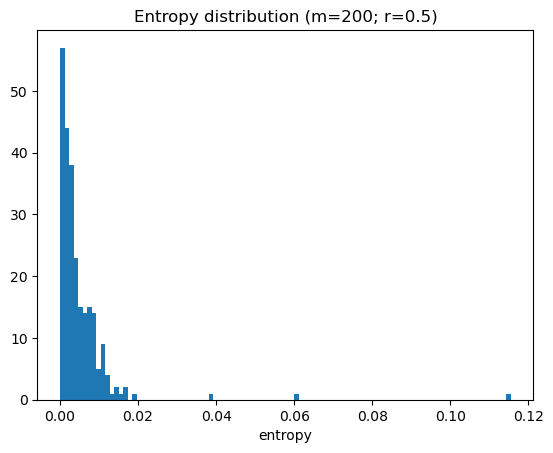

In [21]:
print("valid entropy value: "+str(len(SampEn_m200_r05)))
print("infinity value: "+str(inf_count_200))
print("zero value: "+str(zero_count_200))
plt.xlabel("entropy")
plt.title("Entropy distribution (m=200; r=0.5)")
plt.hist(SampEn_m200_r05, bins=100)
plt.show()

In [31]:
print("max: "+str(max(SampEn_m200_r05)))
print("min: "+str(min(SampEn_m200_r05)))
print("mean: "+str(sum(SampEn_m200_r05)/len(SampEn_m200_r05)))
print("std: "+str(np.std(SampEn_m200_r05)))

max: 0.11551288712184435
min: -0.0
mean: 0.004920974742336886
std: 0.009001150835731036


In [22]:
m=100
r=0.5
SampEn_m100_r05_part=[]
SampEn_m100_r05=[]
inf_count_100=0
zero_count_100=0
for part in tqdm(Day1_list):
    SampEn_part=[]
    for session in part.D1_rating:
        r_std=r*np.std(session)
        en=nolds.sampen(session, emb_dim=m, tolerance=r_std)
        SampEn_part.append(en)
        if math.isinf(en):
            inf_count_100+=1
        else:
            SampEn_m100_r05.append(en)
            if en==0:
                zero_count_100+=1
    SampEn_m100_r05_part.append(SampEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

valid entropy value: 248
infinity value: 1
zero value: 8


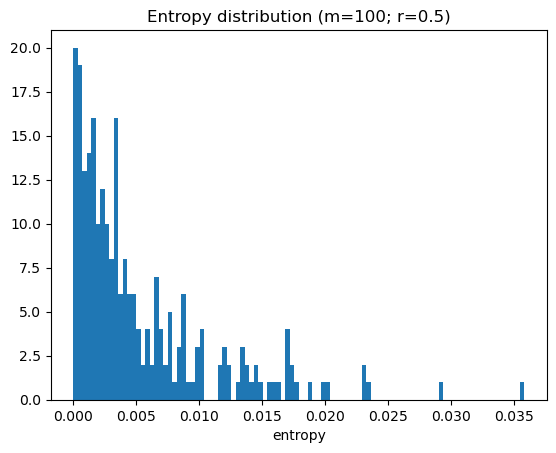

In [23]:
print("valid entropy value: "+str(len(SampEn_m100_r05)))
print("infinity value: "+str(inf_count_100))
print("zero value: "+str(zero_count_100))
plt.xlabel("entropy")
plt.title("Entropy distribution (m=100; r=0.5)")
plt.hist(SampEn_m100_r05, bins=100)
plt.show()

In [30]:
print("max: "+str(max(SampEn_m100_r05)))
print("min: "+str(min(SampEn_m100_r05)))
print("mean: "+str(sum(SampEn_m100_r05)/len(SampEn_m100_r05)))
print("std: "+str(np.std(SampEn_m100_r05)))

max: 0.03583490100288272
min: -0.0
mean: 0.005196173847832029
std: 0.005665975922177587


In [24]:
m=300
r=0.5
SampEn_m300_r05_part=[]
SampEn_m300_r05=[]
inf_count_300=0
zero_count_300=0
for part in tqdm(Day1_list):
    SampEn_part=[]
    for session in part.D1_rating:
        r_std=r*np.std(session)
        en=nolds.sampen(session, emb_dim=m, tolerance=r_std)
        SampEn_part.append(en)
        if math.isinf(en):
            inf_count_300+=1
        else:
            SampEn_m300_r05.append(en)
            if en==0:
                zero_count_300+=1
    SampEn_m300_r05_part.append(SampEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

valid entropy value: 245
infinity value: 4
zero value: 14


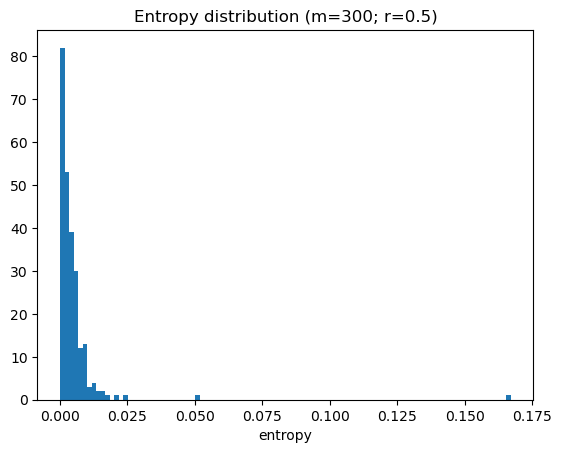

In [25]:
print("valid entropy value: "+str(len(SampEn_m300_r05)))
print("infinity value: "+str(inf_count_300))
print("zero value: "+str(zero_count_300))
plt.xlabel("entropy")
plt.title("Entropy distribution (m=300; r=0.5)")
plt.hist(SampEn_m300_r05, bins=100)
plt.show()

In [32]:
print("max: "+str(max(SampEn_m300_r05)))
print("min: "+str(min(SampEn_m300_r05)))
print("mean: "+str(sum(SampEn_m300_r05)/len(SampEn_m300_r05)))
print("std: "+str(np.std(SampEn_m300_r05)))

max: 0.1670540846631662
min: -0.0
mean: 0.004663114357503173
std: 0.011438678946112498


In [26]:
m=400
r=0.5
SampEn_m400_r05_part=[]
SampEn_m400_r05=[]
inf_count_400=0
zero_count_400=0
for part in tqdm(Day1_list):
    SampEn_part=[]
    for session in part.D1_rating:
        r_std=r*np.std(session)
        en=nolds.sampen(session, emb_dim=m, tolerance=r_std)
        SampEn_part.append(en)
        if math.isinf(en):
            inf_count_400+=1
        else:
            SampEn_m400_r05.append(en)
            if en==0:
                zero_count_400+=1
    SampEn_m300_r05_part.append(SampEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

valid entropy value: 242
infinity value: 7
zero value: 16


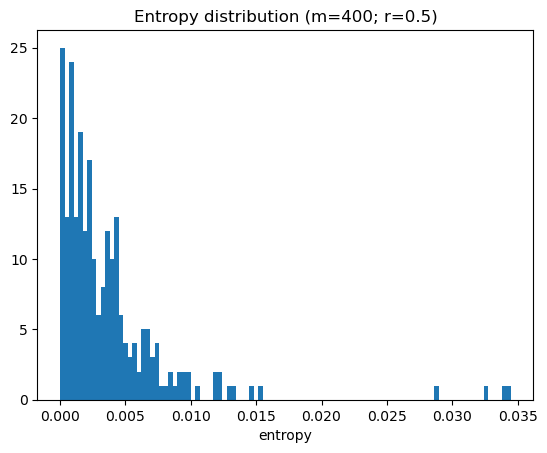

In [27]:
print("valid entropy value: "+str(len(SampEn_m400_r05)))
print("infinity value: "+str(inf_count_400))
print("zero value: "+str(zero_count_400))
plt.xlabel("entropy")
plt.title("Entropy distribution (m=400; r=0.5)")
plt.hist(SampEn_m400_r05, bins=100)
plt.show()

In [33]:
print("max: "+str(max(SampEn_m400_r05)))
print("min: "+str(min(SampEn_m400_r05)))
print("mean: "+str(sum(SampEn_m400_r05)/len(SampEn_m400_r05)))
print("std: "+str(np.std(SampEn_m400_r05)))

max: 0.03448617607116932
min: -0.0
mean: 0.0037203255746267425
std: 0.0047831244954842705


In [12]:
def generate_Coarse_grained(data,scale):
    averages = []
    for i in range(0, len(data)-scale+1, scale):
        average = sum(data[i:i+scale]) / scale
        averages.append(average)
    if len(data)%scale!=0:
        averages.extend(data[-1*(len(data)%scale):])
    return averages
def MSEn(data,scale,m,r):
    MSdata=generate_Coarse_grained(data,scale)
    r=r*np.std(MSdata)
    m=m//scale
    return nolds.sampen(MSdata, emb_dim=m, tolerance=r)

In [13]:
m=200
r=0.5
scale=3
MSEn_m200_r05_s3_part=[]
MSEn_m200_r05_s3=[]
inf_count_200=0
zero_count_200=0
for part in tqdm(Day1_list):
    MSEn_part=[]
    for session in part.D1_rating:
        en=MSEn(session, scale, m, r)
        MSEn_part.append(en)
        if math.isinf(en):
            inf_count_200+=1
        else:
            MSEn_m200_r05_s3.append(en)
            if en==0:
                zero_count_200+=1
    MSEn_m200_r05_s3_part.append(MSEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

valid entropy value: 248
infinity value: 1
zero value: 12


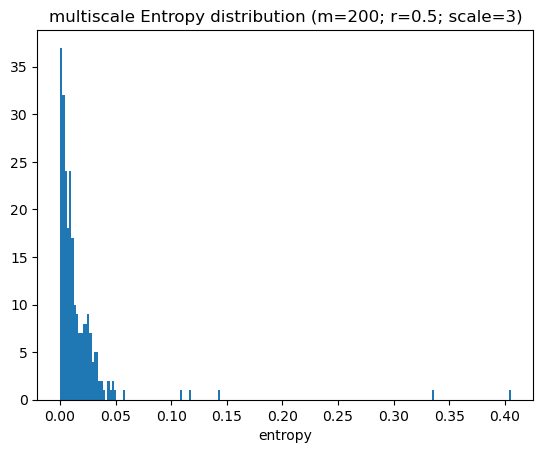

In [16]:
print("valid entropy value: "+str(len(MSEn_m200_r05_s3)))
print("infinity value: "+str(inf_count_200))
print("zero value: "+str(zero_count_200))
plt.xlabel("entropy")
plt.title("multiscale Entropy distribution (m=200; r=0.5; scale=3)")
plt.hist(MSEn_m200_r05_s3, bins=200)
plt.show()

In [17]:
print("max: "+str(max(MSEn_m200_r05_s3)))
print("min: "+str(min(MSEn_m200_r05_s3)))
print("mean: "+str(sum(MSEn_m200_r05_s3)/len(MSEn_m200_r05_s3)))
print("std: "+str(np.std(MSEn_m200_r05_s3)))

max: 0.40546510810816444
min: -0.0
mean: 0.016752819392085165
std: 0.03613452335767878


In [18]:
m=200
r=0.5
scale=2
MSEn_m200_r05_s2_part=[]
MSEn_m200_r05_s2=[]
inf_count_200=0
zero_count_200=0
for part in tqdm(Day1_list):
    MSEn_part=[]
    for session in part.D1_rating:
        en=MSEn(session, scale, m, r)
        MSEn_part.append(en)
        if math.isinf(en):
            inf_count_200+=1
        else:
            MSEn_m200_r05_s2.append(en)
            if en==0:
                zero_count_200+=1
    MSEn_m200_r05_s2_part.append(MSEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

valid entropy value: 248
infinity value: 1
zero value: 13


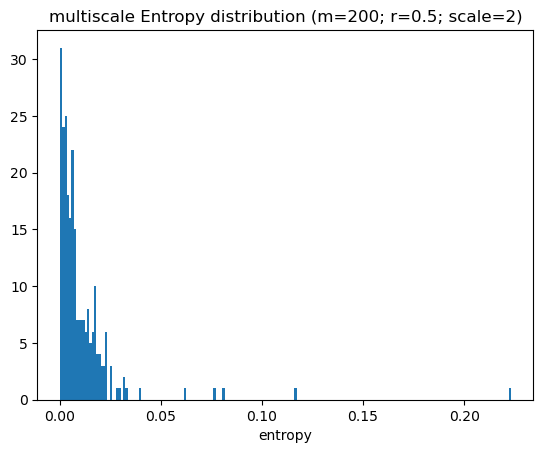

In [22]:
print("valid entropy value: "+str(len(MSEn_m200_r05_s2)))
print("infinity value: "+str(inf_count_200))
print("zero value: "+str(zero_count_200))
plt.xlabel("entropy")
plt.title("multiscale Entropy distribution (m=200; r=0.5; scale=2)")
plt.hist(MSEn_m200_r05_s2, bins=200)
plt.show()

In [21]:
print("max: "+str(max(MSEn_m200_r05_s2)))
print("min: "+str(min(MSEn_m200_r05_s2)))
print("mean: "+str(sum(MSEn_m200_r05_s2)/len(MSEn_m200_r05_s2)))
print("std: "+str(np.std(MSEn_m200_r05_s2)))

max: 0.2231435513142097
min: -0.0
mean: 0.010377138691799067
std: 0.01838887085822562


## Composite Multiscale Entropy

In [36]:
def CMSEn(data,scale,m,r):
    m=m//scale
    En_list=[]
    for start in range(0,scale):
        if start ==0:
            MSdata=generate_Coarse_grained(data,scale)
            # print(MSdata)
            r_std=r*np.std(MSdata)
            En_list.append(nolds.sampen(MSdata, emb_dim=m, tolerance=r_std))
        else:
            MSdata=generate_Coarse_grained(data[start:],scale)
            MSdata_final=data[0:start]+MSdata
            # print(MSdata_final)
            r_std=r*np.std(MSdata_final)
            En_list.append(nolds.sampen(MSdata_final, emb_dim=m, tolerance=r_std))
    return sum(En_list)/len(En_list)

In [37]:
m=200
r=0.5
scale=2
CMSEn_m200_r05_s2_part=[]
CMSEn_m200_r05_s2=[]
inf_count_200=0
zero_count_200=0
for part in tqdm(Day1_list):
    CMSEn_part=[]
    for session in part.D1_rating:
        en=CMSEn(session, scale, m, r)
        CMSEn_part.append(en)
        if math.isinf(en):
            inf_count_200+=1
        else:
            CMSEn_m200_r05_s2.append(en)
            if en==0:
                zero_count_200+=1
    CMSEn_m200_r05_s2_part.append(CMSEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

valid entropy value: 248
infinity value: 1
zero value: 13


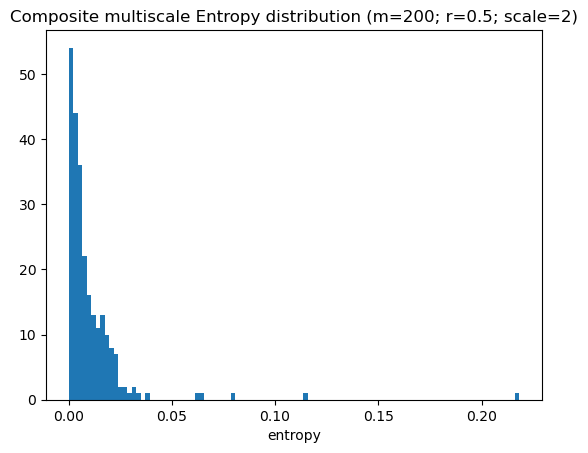

In [41]:
print("valid entropy value: "+str(len(CMSEn_m200_r05_s2)))
print("infinity value: "+str(inf_count_200))
print("zero value: "+str(zero_count_200))
plt.xlabel("entropy")
plt.title("Composite multiscale Entropy distribution (m=200; r=0.5; scale=2)")
plt.hist(CMSEn_m200_r05_s2, bins=100)
plt.show()

In [39]:
print("max: "+str(max(CMSEn_m200_r05_s2)))
print("min: "+str(min(CMSEn_m200_r05_s2)))
print("mean: "+str(sum(CMSEn_m200_r05_s2)/len(CMSEn_m200_r05_s2)))
print("std: "+str(np.std(CMSEn_m200_r05_s2)))

max: 0.21835882580613436
min: 0.0
mean: 0.010309722129589778
std: 0.0179252164443738


In [ ]:
## fourier entropy

In [4]:
def calculate_fourier_entropy(signal):
    # Compute the Fourier transform of the signal
    spectrum = np.fft.fft(signal)

    # Normalize the magnitude spectrum
    normalized_spectrum = np.abs(spectrum) / np.sum(np.abs(spectrum))

    # Calculate the probability distribution function (PDF)
    pdf = normalized_spectrum / np.sum(normalized_spectrum)

    # Calculate the Fourier entropy
    entropy = -np.sum(pdf * np.log2(pdf))

    return entropy

In [5]:
FourierEn_part=[]
FourierEn=[]
inf_count=0
zero_count=0
for part in tqdm(Day1_list):
    FourEn_part=[]
    for session in part.D1_rating:
        en=calculate_fourier_entropy(session)
        FourEn_part.append(en)
        if math.isinf(en):
            inf_count+=1
        else:
            FourierEn.append(en)
            if en==0:
                zero_count+=1
    FourierEn_part.append(FourEn_part)

  0%|          | 0/79 [00:00<?, ?it/s]

C:\Users\28946\AppData\Local\Temp\ipykernel_16892\4206238774.py:12: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(pdf * np.log2(pdf))
C:\Users\28946\AppData\Local\Temp\ipykernel_16892\4206238774.py:12: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(pdf * np.log2(pdf))


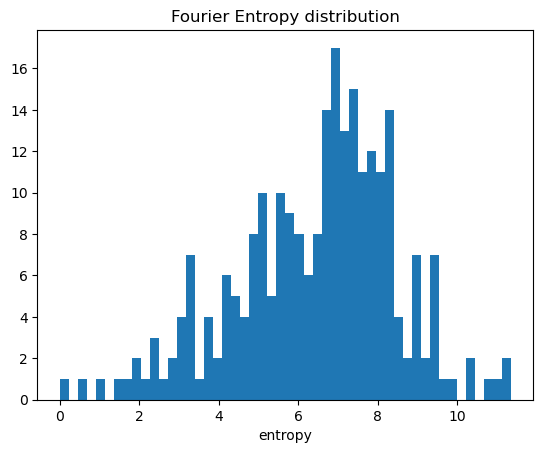

In [9]:
plt.xlabel("entropy")
plt.title("Fourier Entropy distribution")
plt.hist(FourierEn, bins=50)
plt.show()